# Linear Regression with OLS



In [16]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("housing_price_data.csv")

df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


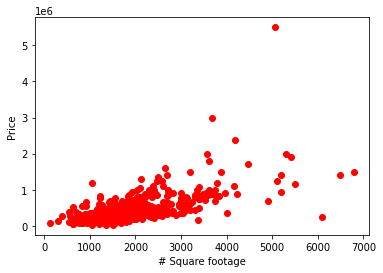

In [17]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [18]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure 
# the scale is compatible with the bias, which is 1
normalize = X.max(0) - X.min(0)
X =  X / normalize

# Add bias
z=np.ones((len(X),1)) 
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)                
y = y.reshape(len(X),1) 

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

(781, 2)
(781, 1)


# **Perform Gradient Descent**

In [19]:
# Initialize vector w 
w = np.random.rand(2,1)

# Learning rate
nu = 0.01

# Number of iterations
MAX_ITR = 2000  

mse = []                       

# Loop
for itr in range (0, MAX_ITR):
    # Form W matrix -- this is to avoid having another for loop but if you don't to use it, that ok
    W = (np.matlib.repmat(w.transpose(),len(X),1))   # 781x2
    
    # Update equation
    fx = np.sum(np.multiply(W, X), axis=1, keepdims=True)    # element-wise multiplication  576x2\
    d1 = fx - y
    w = w - nu*np.transpose(\
            np.mean(np.multiply(d1,X), axis=0, keepdims=True)) # average across columns
    
    # Find predicted value yhat and compute MSE
    yhat = np.dot(X,w)
    mse.append(np.sum((yhat-y)**2) / (2*len(y)))


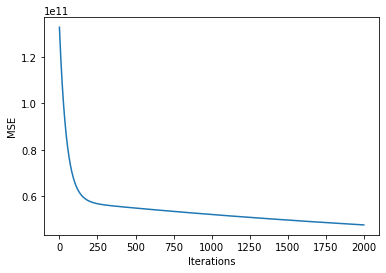

In [20]:
### Plot MSE vs iterations
plt.plot(mse)  #
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

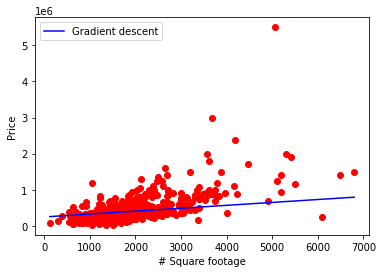

In [21]:
### Plot fitted curve
yhat = np.dot(np.sort(X, axis=0),w)

plt.plot(X[:,1] * normalize, y, 'ro')
plt.plot(Xsort[:,1] *normalize , yhat, 'b', label="Gradient descent")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

## **OLS METHOD**

In [24]:
# Linear Regression by Ordinary Least Squares method
# TO DO: compute w_ols

## Your code goes here ...
w_ols=np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),y))

print(w_ols)
print(w)

[[-113509.75165712]
 [1891038.30009269]]
[[247410.93344688]
 [536624.55916411]]


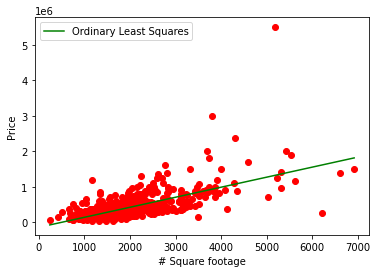

In [26]:
### Plot fitted curve

yhat_ols = np.dot(np.sort(X, axis=0),w_ols)

plt.plot(X[:,1] * max_min + Xmin, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, yhat_ols, 'g', label="Ordinary Least Squares")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()
